# Task Train a KNN model on glass type dataset and find best n_neighnours.

In [1]:
# Your code goes here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('glass.csv')
print(df.shape)
df.head()

(214, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


# Data Splitting

In [5]:
X = df.drop(columns=['Type'])
Y = df['Type']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

X_train.shape, X_test.shape

((171, 9), (43, 9))

# Feature Scaling--- Necessary for KNN

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training

In [8]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [9]:
y_pred = knn.predict(X_test)

In [10]:
accuracy_score(y_test, y_pred)

0.7674418604651163

# Cross Validation and Best n_neighbors value

In [13]:
scores = []

for i in range(1,20):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores.append(accuracy_score(y_test, y_pred))
  print(f'For {i} Accuracy score is: {scores[i-1]}')

For 1 Accuracy score is: 0.7674418604651163
For 2 Accuracy score is: 0.6976744186046512
For 3 Accuracy score is: 0.813953488372093
For 4 Accuracy score is: 0.7209302325581395
For 5 Accuracy score is: 0.6976744186046512
For 6 Accuracy score is: 0.6511627906976745
For 7 Accuracy score is: 0.7209302325581395
For 8 Accuracy score is: 0.6976744186046512
For 9 Accuracy score is: 0.6744186046511628
For 10 Accuracy score is: 0.627906976744186
For 11 Accuracy score is: 0.627906976744186
For 12 Accuracy score is: 0.6511627906976745
For 13 Accuracy score is: 0.6511627906976745
For 14 Accuracy score is: 0.6744186046511628
For 15 Accuracy score is: 0.6976744186046512
For 16 Accuracy score is: 0.6976744186046512
For 17 Accuracy score is: 0.7209302325581395
For 18 Accuracy score is: 0.7209302325581395
For 19 Accuracy score is: 0.7209302325581395


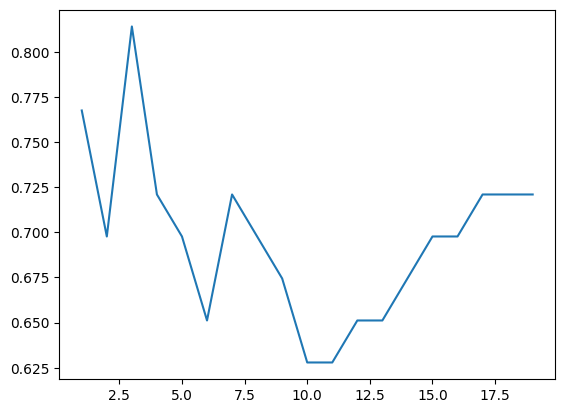

In [14]:
plt.plot(range(1,20), scores)

In [16]:
np.max(scores)

np.float64(0.813953488372093)

# So the best value for n_neighbors is: 3